1112, 1114 영어음성학

In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [8]:
amp=1
sr=10000
dur=0.5
freq=100.0

In [9]:
t=np.arange(1,sr*dur+1)/sr

In [10]:
theta=t*2*np.pi*freq

In [11]:
s=np.sin(theta)

In [12]:
c=np.exp(theta*1j)

In [10]:
ipd.Audio(s,rate=sr)

ipd.Audio(c.real, rate=sr) 함수가 실행 안 되는 경우 새로운 함수

In [14]:
#pip install sounddevice
import sounddevice as sd
sd.play(c.real,sr)

#를 앞에 붙이면 더이상 실행되지 않음

sr과 freq 구분, sr은 1초동안 얼마나 많은 '점'들이 있느냐, freq은 wave가 얼마나 반복되느냐임

amp는 지금까지 어디서 쓴 적이 없음. 어디에 쓸까?

amp : 진폭이 얼마나 커지는가

그냥 np.sin(theta)면 -1부터 1까지, 여기에 2를 곱하면 -2부터 2까지

진폭은 np.sin(theta)에다 곱해줌

In [16]:
amp=2
sr=10000
dur=0.5
freq=100.0

In [17]:
s=amp*np.sin(theta)

Text(0, 0.5, 'real')

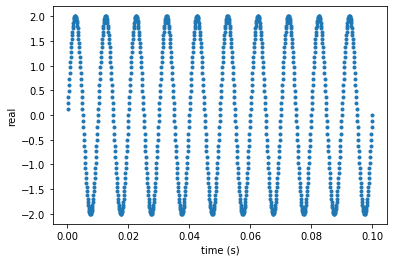

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [21]:
c=amp*np.exp(theta*1j)

Text(0.5, 0, 'imag')

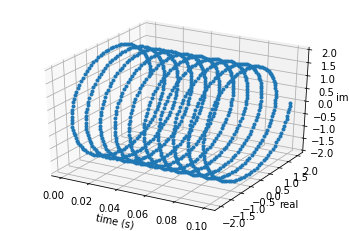

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

complex phasor의 amplitude : 원통의 반지름의 길이와 같다. (위의 예시에서는 2)

F0를 먼저 정하고, 그것의 배음을 하나하나 합쳐가는 법을 어떻게 python으로 구현할 수 있는가

sampling rate와 frequency가 연결되는 부분이 있음.

sr=100 (1초에 100개의 숫자가 주어져 있음)로 freq=1Hz를 표현할 수 있을까? 표현가능함. 한번의 sin wave만 있으면 되니까

2Hz도 가능
10000Hz가 가능할까? 불가능함. 우리가 가진 숫자가 너무 적다

결론: sr이 freq보다 많이 있어야 wave를 표현할 수 있음

주어진 sr에서 우리가 표현할 수 있는 freq의 최대는 sr의 반밖에 안 됨. sr이 10Hz라면 표현할 수 있는 freq 최대는 5임 

= nyquist frequency (sr의 무조건 반)

CD 음질 : sr=44100Hz, nyquist freq=22050Hz

사람이 들을 수 있는 가청주파수 : 최대 20000Hz이므로, 22050Hz까지만 설정해놓으면 경제적으로 모두가 들을 수 있는 정도를 포함함. 20000Hz보다도 높은 것을 초음파라고 함

예전에 쓰던 유선전화는 freq 4000Hz가 최대였음.
현재 전화기는 16000Hz 쓰므로, 전화하는 상대의 목소리를 더 잘 들을 수 있고, 구분가능함.

즉, sr의 절반까지만 freq가 표현될 수 있고, 이를 nyquist frequency라고 함.

Hz를 무한대로 올릴 수 있을까? 없음, sr의 절반까지밖에 못 올림, sr을 얼마나 정하느냐에 따라 freq의 최대가 정해짐

Fend : F의 마지막, sr의 절반인 nyquist frequency

int: 지저분하지 않게 정수로 나오게 반올림 처리

freq만 바꿔주며 여러 번 반복하는 것이 핵심

range: F0부터 Fend까지, F0만큼 올라간다. +1은 제일 마지막 것도 포함시키기 위해 추가

100부터 5000까지 루프가 50번 돔

제일 처음 s가 뭔지도 제일 위에서 정의해줘야 함, 제일 처음의 s는 0이면 되므로 s에 0을 넣어주기 위해 np.zeros(len(t))라고 적어줌 (time 벡터의 개수만큼 0을 넣어준다)

s=s+tmp : s에 변수(tmp)를 계속 더하고 그걸 다시 s로 하고, 다음 바퀴를 돌면서 다시 더하고 그걸 다시 s로 해라

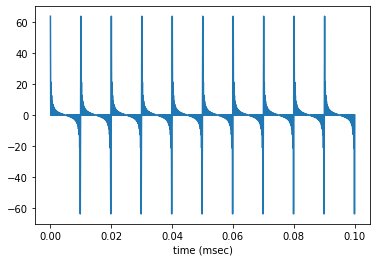

In [26]:
F0=100; Fend=int(sr/2); s=np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta=t*2*np.pi*freq
    tmp=amp*np.sin(theta)
    s=s+tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

100부터 5000Hz까지 다 돌면 다 더해진 하나의 s값이 나올 것이고, time을 x축으로, 더해진 s값을 y축으로 하는 그래프

예전에 100Hz-1000Hz 직접 만들어서 praat으로 더한 것보다 더 정교함 (프로그램으로 엄청 많이 더했으니까)

왜 pulse train이라는 명칭을 붙였을까?

sin wave라고 불리는 부드러운 부분이 없어지고, 선 하나가 남아있고 0,0,0, 선 하나가 남아있고 0,0,0 이렇게 되므로

1114 영어음성학

어디에 산맥 (formant)을 만들지 프로그램을 지정해 볼 거고, 산맥을 만들면 기계 목소리에서 좀 더 사람 목소리같이 바뀜.

In [40]:
amp=1
sr=10000
dur=0.5
freq=440.0

In [41]:
t=np.arange(1,sr*dur+1)/sr

In [42]:
theta=t*2*np.pi*freq

In [43]:
s=amp*np.sin(theta)

<IPython.core.display.Javascript object>


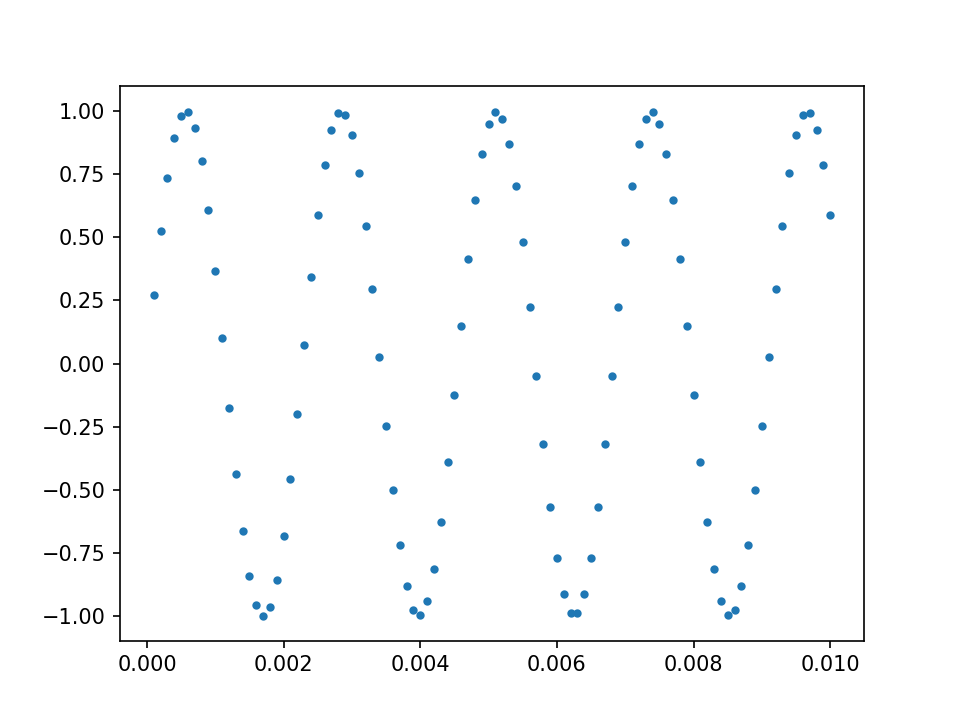

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t[0:100],s[0:100],'.')

In [49]:
ipd.Audio(s, rate=sr)

In [13]:
amp=1
sr=10000
dur=0.5
freq=220.0

In [14]:
t=np.arange(1,sr*dur+1)/sr

In [15]:
theta=t*2*np.pi*freq

In [16]:
s=amp*np.sin(theta)

In [17]:
ipd.Audio(s,rate=sr)

440Hz 라, 880Hz 라, 220Hz 라 등등 배수는 같은 소리가 남.

In [18]:
c=amp*np.sin(theta)

In [19]:
ipd.Audio(c.real, rate=sr)

sin의 라와 cos의 라가 다르게 들리지는 않음.

sin과 cos은 2분의 파이 (90도)만큼의 차이가 있음.

그래프가 1도 이동하든, 5도 이동하든, 90도 이동하든 소리의 차이는 없음. 즉, phase는 우리 귀가 인식하지 못함(sensitivity 없음)

freq에 대한 sensitivity는 있음.

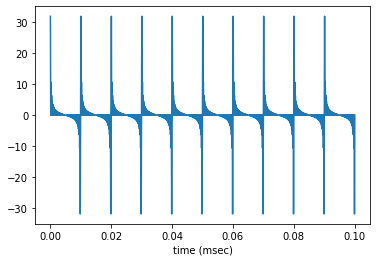

In [20]:
F0=100; Fend=int(sr/2);s=np.zeros(len(t));
for freq in range(F0,Fend+1,F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

함수 직접 만들어서 쓰기 : def라고 적고 그 옆에 function name을 적음, 괄호 열고 내가 쓰고싶은 입력들을 적음

괄호 안이 입력값, return이 출력값

hz2w는 resonance 안에 들어가기 위해 만든 함수

In [21]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

RG : 어디에 산맥을 만들 것인지

(RG=0이면 0에 산맥이 만들어져서, gradually decreased 되는 모양)

BW(bandwidth): 산맥의 폭(삐죽하거나 뚱뚱하거나)-> 산맥의 모양을 결정

100정도면 산맥이 뚱뚱한 편

In [55]:
amp=1
sr=10000
dur=0.5
freq=100.0

In [56]:
t=np.arange(1,sr*dur+1)/sr

In [57]:
theta=t*2*np.pi*freq

In [58]:
s=amp*np.sin(theta)

In [59]:
RG=0
BWG=100
a,b =resonance(sr,RG,BWG)
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

In [60]:
RG=500
BWG=60
a,b =resonance(sr,RG,BWG)
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

다운로드 받아서 praat으로 분석해보면, 산맥이 RG 위치에 나타남

In [61]:
RG=1500
BWG=200
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [62]:
RG=2500
BWG=200
a,b=resonance(sr,RG,BWG)
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

In [63]:
RG=3500
BWG=200
a,b=resonance(sr,RG,BWG)
s=lfilter(b,a,s,axis=0)
ipd.Audio(s,rate=sr)

입술이 있기 때문에 소리가 공명되어서 커지는 것임

In [64]:
s=lfilter(np.array([1,-1]),np.array([1]),s)
ipd.Audio(s,rate=sr)

입술을 만드는 코드

소리 비교하면 밑에가 더 큼

1203, 1205 영어음성학

a,b의 길이가 고정되어 있다면, dot product의 값은 angle에 따라 달라짐. a와 b 사이의 각도가 90도라면 dot product값이 제일 작다.

a와 b 사이 각도가 0에 가까워질수록 dot product는 점점 커지고, 90도에 가까워질수록 그 값이 작아짐.

dot product 값: |b|x|a|xcos theta

cos theta-> cosine similarity : 두 벡터가 얼마나 가까운지를 angle로 표현.

어떤 wave 속에 어떤 sine wave가 아는 것이 중요.-> spectrogram

어떤 frequency 성분이 많은가.

무수한 frequency 성분들의 합인데, 이중 무슨 성분들이 가장 많은지. 아무리 복잡한 signal도 단순한 성분들의 합임.

어느 성분이 얼마나 많이 들어 있는지 알아내서 plotting하는 작업

wave 자체가 벡터

전체 wave의 크기와 똑같이 한 헤르츠의 wave를 만들어서 inner product함으로써 얼마나 들어있는지 알 수 있음.

여러 종류의 sine wave를 Hz별로 만들어서 원래의 complex wave와 inner product하고, 그 값을 plotting.

그런데 이 방법은 문제가 있음. frequency 값이 똑같은 wave를 90도 이동했는데, inner product값이 0이 되는 경우가 있음. 즉 결과값이 phasor에 따라서 민감하게 변해서 (phasor sensitivity가 큼) 민감하지 않은 complex phasor을 사용할 것임.

complex phasor은 실수일까 허수일까? 허수를 포함하는 complex number가 나올 것임. 따라서 inner product하면 한 값이 나오는데, complex number가 나오는 경우가 있음. sin이나 cos 함수에서는 실수를 plotting하면 됐는데, complex number은 어떻게 plotting하지?-> a+bi에 대하여 절댓값을 씌움.

complex number a+bi에서 실수축과 허수축을 만들고, (a,b)를 찍음. 이때 a+bi의 절댓값은 원점에서 점 (a,b)까지의 거리.

inner product를 할 때에는 두 개의 dimension이 같아야 함. 즉, 분석하려는 wave의 sample이 30개라면, 나머지 Hz의 sample도 30개여야 함. 

In [65]:
from scipy.io import wavfile
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

scipy.io로부터 wavfile이라는 function을 쓸 수 있도록 import
->외부에서부터 wave file을 갖고 오고 싶을 때 사용

inner product하기 위해서는 원래 wave(target wave)의 길이가 얼마인지 알아야 하므로, 샘플 개수가 중요해짐. 샘플의 개수=원래 wave s의 길이

nSamp=len(s)

In [66]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

nSamp를 nFFT로 다시 설정. 

for loop-> sample 개수만큼 돌아감.

z = np.exp(omega*1j)**(np.arange(0,nSamp))
-> complex phasor을 만드는 줄.
exp(exponential) : e , **는 지수를 나타냄. 즉 ** 이후가 앞부분의 지수로 올라감.

지수끼리 곱하면, (omega*1j)*(np.arange(0,nSamp))

sample 100개라고 가정,
omega = 2*np.pi*n/nFFT -> 첫번째 loop에서 omega는 2pix0/100=0

두번째 loop에서 omega는 2pix1/100, 이고, 여기에 i와 [0..100]을 곱하면 2pix1x[0...1]i=[0...2pi] 즉 한 바퀴, theta가 됨. 한 바퀴를 100개의 sample으로 표현

세번째 loop는 2pix2x[0...1]i=[0...4pi]i -> 두 바퀴를 100개의 sample로 표현. 

이런 식으로 어디까지 가느냐-> nSamp 바퀴까지 감.(100바퀴)

이렇게 하나씩 만들어서 original wave s에 곱해줄 것임.

original signal s가 있고, 여러 z를 만들었음. z0부터 z(nSamp-1)까지 있는데, 각각을 s에 inner product. 그 계산은 어디서 하느냐?->  amp.append(np.abs(np.dot(s,z)))

z값은 loop를 돌 때마다 달라짐. abs=절댓값. 그러므로 complex값이 나온다 할지라도, abs 해주면 절댓값이 된다.

amp = []; 이렇게 amp에 빈값을 만들어놓고, amp.append해서 loop 돌 때마다 하나씩 넣어둔다. loop가 끝나고 나서 amp의 길이는 loop의 횟수가 됨.(100)

amp에 허수가 들어있다->F (amp에는 abs가 있기 때문에 허수가 나올 수가 없음.)

이후 amp를 plotting하면 끝!

Text(0, 0.5, 'amplitude')

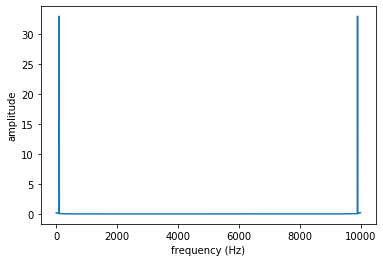

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

1,2줄:이미 배움

x값이랑 y값을 설정해야 하는데, y에 해당되는 값은 이미 amp로 받아옴. 에너지값이니까 amp라고 표현함. x에 해당되는 좌표는?
-> freq=1부터 nFFT(100)까지에다가 sr을 곱해줌. 다시 sample의 개수 nFFT로 나눠줌 = [100 200 300 ... 10000] 이 개수는 100개, 이걸 x축으로 해줄 것

x축: 0부터 10000까지, 그래프의 총 bar의 수는 sampling rate와 똑같음. 좌우대칭이라서, 0에서 반까지만 의미가 있음. 뒤에는 중복되기 때문에 (nyquist frequency) 여기서 처음부터 반까지를 spectrum이라고 함. 각 frequency 성분들이 dot product하면서 받아오는 값.

(위의 그래프는 모양이 이상해서 교수님 github 그래프 참고)
2000Hz에 해당되는 성분의 양-> y축 보면 됨. 500Hz에 해당되는 값은 80 정도가 나옴.

제일 처음에 우리가 s를 어떻게 만들었는지 생각해 보면, 원 s는 frequency가 높아질수록 점점 작아지게 만들었고, 500, 1500, 2500에 산을 만들어주었음. 그게 그대로 저 spectrum에 나타남.

바이올린 연주에 100개의 sample-> 고주파에서 높게 나타날 것이다. 

위의 그래프는 주파수가 x축인데, 시간의 개념이 아님. 시간축으로 확장된 것이 spectrogram. spectrogram의 한 slice를 보면, 500Hz에서 진하게 있고, 1500에서 흐려지고, 점점점 흐려짐.

cos(90)은 0이 되는데, 두 벡터가 90도가 된다면 a와 b는 orthogonal하고 dot product값은 0이 된다.

cos(theta)=r이 1일 때, a가 가는 방향대로 b도 간다.

예를 들어 영어점수가 a, 국어점수가 b, 학생 수가 10이라면 각각 10차원의 벡터가 만들어짐. a=[10,20,30...100], b=[0,10,...90] 이라고 하면, 일직선상의 그래프가 나옴. 즉 일직선상=상관관계 1.일직선상에 가까우면 가까울수록 r의 절댓값도 1에 가깝다. 만약 우하향 그래프면 상관관계는 마이너스. 

두 가지 그래프로 그릴 수 있는데, 하나는 우리가 잘 아는 좌표평면, 하나는 10차원에서 두 점을 찍음-> 두번째 그래프를 통해 그 두 점 사이의 각돗값을 알 수 있음. 그 각돗값에 cos을 취했더니 첫번째 그래프에서의 r값이랑 똑같아짐.

Q: 영어벡터와 국어벡터가 일직선상에 있다-> 두 벡터 사이가 각도가 0. 우하향하는 일직선상에 있다-> r값은 -1, 두 벡터는 n차원의 그래프에서 서로 반대방향을 향하고, 사이의 각도는 180도임. cos 180=-1이다. 모든 게 두 개의 그래프&cos theta 속에서 이해되어야 함.

cos theta, cos similarity

sine wave가 180도 shift되었다고 생각-> 두 wave는 따로 움직임. 내려갈 때 올라오고 올라올 때 내려오는 정반대의 상황. 두 wave는 180도의 phase 차이가 있고, cos 180=-1이므로 상관관계는 완전히 반비례.

한 vector의 값이 엄청 크다고 하더라도, (진폭이 커짐) r값은 정확하게 -1. amplitude 크기는 상관 없음. 방향이 반대라는 것을 알면 됨. n차원 공간에서 한 벡터는 길게 있고, 한 벡터는 짧게 있다고 생각하면 됨. 벡터의 길이에 관계없이 두 벡터 사이의 각도값은 같음. n차원 공간에서 벡터의 길이 = sine wave에서의 진폭

spectrum: x축은 sr 끝까지, 그리고 정확히 반 이후는 필요없음.(중복) nyquist frequency까지만 우리가 표현할 수 있는 주파수임.

spectrum과 spectrogram이 어떻게 연결되느냐: 

spectrogram 아래쪽으로 갈수록 저주파(색이 진함), 위쪽으로 갈수록 고주파인데(색이 옅음), 이걸 spectrum에서 보면 저주파에서 에너지 높고 고주파에서 낮음.

spectrum의 한장한장이 쌓여서 합쳐지고(시간 방향으로 흘러가서) 그걸 다른 각도로 보면 spectrogram이 됨.

preprocessing signal : 하나의 wave를 어떻게 붙여서 spectrogram을 만들까

한장한장씩 만들어서 다 붙여야 spectrogram이 나오는데, 얼마만큼을 할지.

win_size: 얼마만큼의 사이즈를 자를지.
win_step: 어느정도로 이동시킬지

0.008초 사이즈만 잘라서 0.001초씩 이동시키면서 분석-> 스펙트로그램이 나옴.

In [70]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

spectrogram에서 1보다 크면 진하고, 1보다 작으면 옅음. 이거 전체 제곱하면 진한부분은 더 진해지고 옅은 부분은 더 옅어짐

왜 제곱하냐? log를 취하기 위해서

로그 취하면 값이 간단해짐. 0.00001 -> -4가 됨.
0에 가까운 숫자나, 무한대로 커지는 숫자를 다룰 수 있는 숫자로 바뀌는 것이 로그 처리